In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [73]:
df = pd.read_csv('C:\\Users\\imane\\Desktop\\books\\Crime_Data_from_2020_to_Present.csv')
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,201220752,09/16/2020 12:00:00 AM,09/16/2020 12:00:00 AM,1230,12,77th Street,1259,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,NaN,NaN,NaN,700 E 73RD ST,NaN,33.9739,-118.2630
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [74]:
df.shape

(317854, 28)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317854 entries, 0 to 317853
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           317854 non-null  int64  
 1   Date Rptd       317854 non-null  object 
 2   DATE OCC        317854 non-null  object 
 3   TIME OCC        317854 non-null  int64  
 4   AREA            317854 non-null  int64  
 5   AREA NAME       317854 non-null  object 
 6   Rpt Dist No     317854 non-null  int64  
 7   Part 1-2        317854 non-null  int64  
 8   Crm Cd          317854 non-null  int64  
 9   Crm Cd Desc     317854 non-null  object 
 10  Mocodes         274531 non-null  object 
 11  Vict Age        317854 non-null  int64  
 12  Vict Sex        276448 non-null  object 
 13  Vict Descent    276443 non-null  object 
 14  Premis Cd       317849 non-null  float64
 15  Premis Desc     317746 non-null  object 
 16  Weapon Used Cd  116477 non-null  float64
 17  Weapon Des

# Data preprocessing 

In [76]:
# Drop unecessary columns 
df.drop(['DR_NO','Rpt Dist No','Part 1-2','Mocodes','Cross Street','LOCATION','Crm Cd 1','Crm Cd 2','Crm Cd 3','Crm Cd 4'], axis=1,inplace=True)
df 

,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LAT,LON
0,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,624,BATTERY - SIMPLE ASSAULT,36,F,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,34.0141,-118.2978
1,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,624,BATTERY - SIMPLE ASSAULT,25,M,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,34.0459,-118.2545
2,09/16/2020 12:00:00 AM,09/16/2020 12:00:00 AM,1230,12,77th Street,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),62,M,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,33.9739,-118.2630
3,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,34.1685,-118.4019
4,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,409.0,BEAUTY SUPPLY STORE,NaN,NaN,IC,Invest Cont,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317849,03/19/2021 12:00:00 AM,03/19/2021 12:00:00 AM,1105,12,77th Street,510,VEHICLE - STOLEN,0,NaN,NaN,108.0,PARKING LOT,NaN,NaN,IC,Invest Cont,33.9897,-118.2827
317850,03/04/2021 12:00:00 AM,03/04/2021 12:00:00 AM,2210,5,Harbor,434,FALSE IMPRISONMENT,41,F,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",200.0,KNIFE WITH BLADE 6INCHES OR LESS,AA,Adult Arrest,33.7424,-118.2814
317851,07/09/2021 12:00:00 AM,07/09/2021 12:00:00 AM,1050,17,Devonshire,624,BATTERY - SIMPLE ASSAULT,40,M,H,501.0,SINGLE FAMILY DWELLING,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,34.2302,-118.4775
317852,07/12/2021 12:00:00 AM,07/12/2021 12:00:00 AM,1200,3,Southwest,350,"THEFT, PERSON",15,F,H,101.0,STREET,NaN,NaN,IC,Invest Cont,34.0088,-118.3351


In [77]:
df.isnull().sum()

Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Crm Cd                 0
Crm Cd Desc            0
Vict Age               0
Vict Sex           41406
Vict Descent       41411
Premis Cd              5
Premis Desc          108
Weapon Used Cd    201377
Weapon Desc       201377
Status                 0
Status Desc            0
LAT                    0
LON                    0
dtype: int64

## Data Cleaning 


In [78]:
# drop rows that has missing values 
df.dropna(axis=0,inplace=True)
df.reset_index(drop=True,inplace=True)
df

,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LAT,LON
0,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,624,BATTERY - SIMPLE ASSAULT,36,F,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,34.0141,-118.2978
1,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,624,BATTERY - SIMPLE ASSAULT,25,M,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,34.0459,-118.2545
2,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,30,1,Central,121,"RAPE, FORCIBLE",25,F,H,735.0,NIGHT CLUB (OPEN EVENINGS ONLY),500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,34.0452,-118.2534
3,09/12/2020 12:00:00 AM,09/12/2020 12:00:00 AM,30,18,Southeast,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,21,F,B,101.0,STREET,511.0,VERBAL THREAT,IC,Invest Cont,33.9019,-118.2916
4,01/04/2020 12:00:00 AM,01/04/2020 12:00:00 AM,2200,1,Central,330,BURGLARY FROM VEHICLE,29,M,A,101.0,STREET,306.0,ROCK/THROWN OBJECT,IC,Invest Cont,34.0359,-118.2648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116395,03/05/2021 12:00:00 AM,03/05/2021 12:00:00 AM,915,2,Rampart,624,BATTERY - SIMPLE ASSAULT,54,F,H,101.0,STREET,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,34.0593,-118.2750
116396,05/25/2021 12:00:00 AM,05/25/2021 12:00:00 AM,813,6,Hollywood,624,BATTERY - SIMPLE ASSAULT,33,M,B,135.0,MTA PROPERTY OR PARKING LOT,512.0,MACE/PEPPER SPRAY,IC,Invest Cont,34.1016,-118.3391
116397,07/04/2021 12:00:00 AM,07/04/2021 12:00:00 AM,2135,21,Topanga,624,BATTERY - SIMPLE ASSAULT,44,M,W,101.0,STREET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,34.1855,-118.6296
116398,03/04/2021 12:00:00 AM,03/04/2021 12:00:00 AM,2210,5,Harbor,434,FALSE IMPRISONMENT,41,F,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",200.0,KNIFE WITH BLADE 6INCHES OR LESS,AA,Adult Arrest,33.7424,-118.2814


In [79]:
# split 'DATE OCC' into year, month and day 
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])
df['YEAR OCC'] = df['DATE OCC'].dt.year
df['MONTH OCC'] = df['DATE OCC'].dt.month
df['DAY OCC'] = df['DATE OCC'].dt.day
df 

C:\Users\imane\AppData\Local\Temp\ipykernel_4984\2463269389.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])


,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,...,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LAT,LON,YEAR OCC,MONTH OCC,DAY OCC
0,01/08/2020 12:00:00 AM,2020-01-08,2230,3,Southwest,624,BATTERY - SIMPLE ASSAULT,36,F,B,...,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,34.0141,-118.2978,2020,1,8
1,01/02/2020 12:00:00 AM,2020-01-01,330,1,Central,624,BATTERY - SIMPLE ASSAULT,25,M,H,...,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,34.0459,-118.2545,2020,1,1
2,01/02/2020 12:00:00 AM,2020-01-01,30,1,Central,121,"RAPE, FORCIBLE",25,F,H,...,NIGHT CLUB (OPEN EVENINGS ONLY),500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,34.0452,-118.2534,2020,1,1
3,09/12/2020 12:00:00 AM,2020-09-12,30,18,Southeast,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,21,F,B,...,STREET,511.0,VERBAL THREAT,IC,Invest Cont,33.9019,-118.2916,2020,9,12
4,01/04/2020 12:00:00 AM,2020-01-04,2200,1,Central,330,BURGLARY FROM VEHICLE,29,M,A,...,STREET,306.0,ROCK/THROWN OBJECT,IC,Invest Cont,34.0359,-118.2648,2020,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116395,03/05/2021 12:00:00 AM,2021-03-05,915,2,Rampart,624,BATTERY - SIMPLE ASSAULT,54,F,H,...,STREET,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,34.0593,-118.2750,2021,3,5
116396,05/25/2021 12:00:00 AM,2021-05-25,813,6,Hollywood,624,BATTERY - SIMPLE ASSAULT,33,M,B,...,MTA PROPERTY OR PARKING LOT,512.0,MACE/PEPPER SPRAY,IC,Invest Cont,34.1016,-118.3391,2021,5,25
116397,07/04/2021 12:00:00 AM,2021-07-04,2135,21,Topanga,624,BATTERY - SIMPLE ASSAULT,44,M,W,...,STREET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,34.1855,-118.6296,2021,7,4
116398,03/04/2021 12:00:00 AM,2021-03-04,2210,5,Harbor,434,FALSE IMPRISONMENT,41,F,B,...,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",200.0,KNIFE WITH BLADE 6INCHES OR LESS,AA,Adult Arrest,33.7424,-118.2814,2021,3,4


In [80]:
# split 'DATE Rptd' into year, month and day 
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'])
df['Year Rptd'] = df['Date Rptd'].dt.year
df['Month Rptd'] = df['Date Rptd'].dt.month
df['Day Rptd'] = df['Date Rptd'].dt.day
df

C:\Users\imane\AppData\Local\Temp\ipykernel_4984\4120071376.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date Rptd'] = pd.to_datetime(df['Date Rptd'])


,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,...,Status,Status Desc,LAT,LON,YEAR OCC,MONTH OCC,DAY OCC,Year Rptd,Month Rptd,Day Rptd
0,2020-01-08,2020-01-08,2230,3,Southwest,624,BATTERY - SIMPLE ASSAULT,36,F,B,...,AO,Adult Other,34.0141,-118.2978,2020,1,8,2020,1,8
1,2020-01-02,2020-01-01,330,1,Central,624,BATTERY - SIMPLE ASSAULT,25,M,H,...,IC,Invest Cont,34.0459,-118.2545,2020,1,1,2020,1,2
2,2020-01-02,2020-01-01,30,1,Central,121,"RAPE, FORCIBLE",25,F,H,...,IC,Invest Cont,34.0452,-118.2534,2020,1,1,2020,1,2
3,2020-09-12,2020-09-12,30,18,Southeast,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,21,F,B,...,IC,Invest Cont,33.9019,-118.2916,2020,9,12,2020,9,12
4,2020-01-04,2020-01-04,2200,1,Central,330,BURGLARY FROM VEHICLE,29,M,A,...,IC,Invest Cont,34.0359,-118.2648,2020,1,4,2020,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116395,2021-03-05,2021-03-05,915,2,Rampart,624,BATTERY - SIMPLE ASSAULT,54,F,H,...,IC,Invest Cont,34.0593,-118.2750,2021,3,5,2021,3,5
116396,2021-05-25,2021-05-25,813,6,Hollywood,624,BATTERY - SIMPLE ASSAULT,33,M,B,...,IC,Invest Cont,34.1016,-118.3391,2021,5,25,2021,5,25
116397,2021-07-04,2021-07-04,2135,21,Topanga,624,BATTERY - SIMPLE ASSAULT,44,M,W,...,IC,Invest Cont,34.1855,-118.6296,2021,7,4,2021,7,4
116398,2021-03-04,2021-03-04,2210,5,Harbor,434,FALSE IMPRISONMENT,41,F,B,...,AA,Adult Arrest,33.7424,-118.2814,2021,3,4,2021,3,4


In [81]:
df.isnull().sum()

Date Rptd         0
DATE OCC          0
TIME OCC          0
AREA              0
AREA NAME         0
Crm Cd            0
Crm Cd Desc       0
Vict Age          0
Vict Sex          0
Vict Descent      0
Premis Cd         0
Premis Desc       0
Weapon Used Cd    0
Weapon Desc       0
Status            0
Status Desc       0
LAT               0
LON               0
YEAR OCC          0
MONTH OCC         0
DAY OCC           0
Year Rptd         0
Month Rptd        0
Day Rptd          0
dtype: int64

In [82]:
# Relocate columns 
df = df[['Year Rptd','Month Rptd','Day Rptd','YEAR OCC','MONTH OCC','DAY OCC','TIME OCC','AREA','AREA NAME','Crm Cd','Crm Cd Desc','Vict Age','Vict Sex','Vict Descent','Premis Cd','Weapon Used Cd','Weapon Desc','Status']]
df

,Year Rptd,Month Rptd,Day Rptd,YEAR OCC,MONTH OCC,DAY OCC,TIME OCC,AREA,AREA NAME,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Weapon Used Cd,Weapon Desc,Status
0,2020,1,8,2020,1,8,2230,3,Southwest,624,BATTERY - SIMPLE ASSAULT,36,F,B,501.0,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO
1,2020,1,2,2020,1,1,330,1,Central,624,BATTERY - SIMPLE ASSAULT,25,M,H,102.0,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC
2,2020,1,2,2020,1,1,30,1,Central,121,"RAPE, FORCIBLE",25,F,H,735.0,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC
3,2020,9,12,2020,9,12,30,18,Southeast,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,21,F,B,101.0,511.0,VERBAL THREAT,IC
4,2020,1,4,2020,1,4,2200,1,Central,330,BURGLARY FROM VEHICLE,29,M,A,101.0,306.0,ROCK/THROWN OBJECT,IC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116395,2021,3,5,2021,3,5,915,2,Rampart,624,BATTERY - SIMPLE ASSAULT,54,F,H,101.0,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC
116396,2021,5,25,2021,5,25,813,6,Hollywood,624,BATTERY - SIMPLE ASSAULT,33,M,B,135.0,512.0,MACE/PEPPER SPRAY,IC
116397,2021,7,4,2021,7,4,2135,21,Topanga,624,BATTERY - SIMPLE ASSAULT,44,M,W,101.0,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC
116398,2021,3,4,2021,3,4,2210,5,Harbor,434,FALSE IMPRISONMENT,41,F,B,502.0,200.0,KNIFE WITH BLADE 6INCHES OR LESS,AA


### We will answer these questions :
####     1/ did the crime rates increased or decreased?
####     2/ What are the most common types of crimes reported?
####     3/ In which areas are the crime rates notably high or low?
####     4/ How does the age distribution of victims vary across different crime types?
####     5/ Which gender recorded the highest crime rate?
####     5/ Which weapon was employed most frequently in the reported crimes?
####     6/ During which month was the crime rate at its lowest?
####     7/ On which day of the month was the crime rate at its peak?
####     8/ Among the different ethnicities, which one got the highest crime rate?
####     9/ Are there discernible connections between the usage of weapons and the nature of crimes?
####     10/ Are there patterns indicating gender-related disparities in victimization across diverse crime categories?
####     11/ How has the count of reported crimes changed across years, months, and days?

     

# Data analysis and visualisation 

## The crime rates decreased or increased :

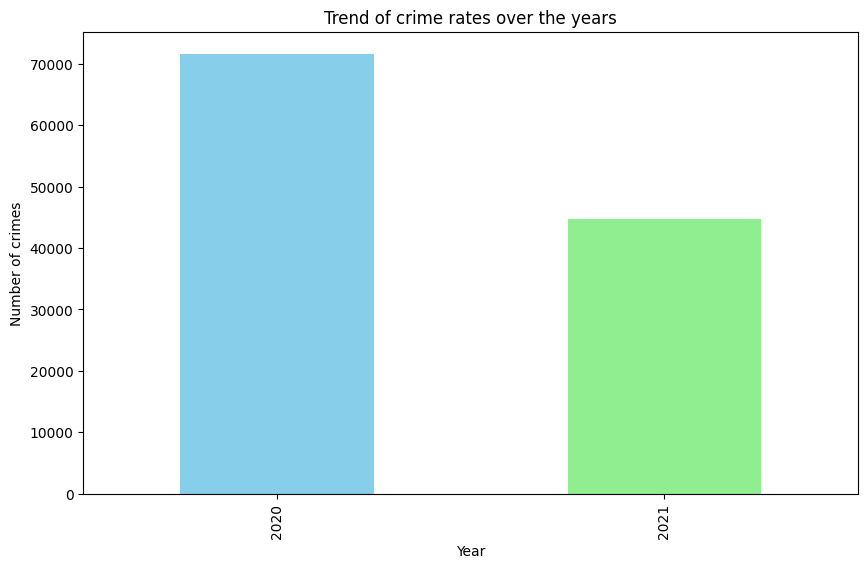

In [83]:
crime_counts_peryear = df.groupby('Year Rptd')['Crm Cd'].count()

plt.figure(figsize=(10,6))
crime_counts_peryear.plot(kind='bar',color=['skyblue', 'lightgreen'])
plt.xlabel('Year')
plt.ylabel('Number of crimes')
plt.title('Trend of crime rates over the years')
plt.show()

#### We can see a decrease in crime rates in 2021 (approximately 44000 incidents) compared to 2020 (approximately 71000 incidents)

## The most common types of crimes reported : 

Text(0.5, 1.0, 'Most common reported crime Types')

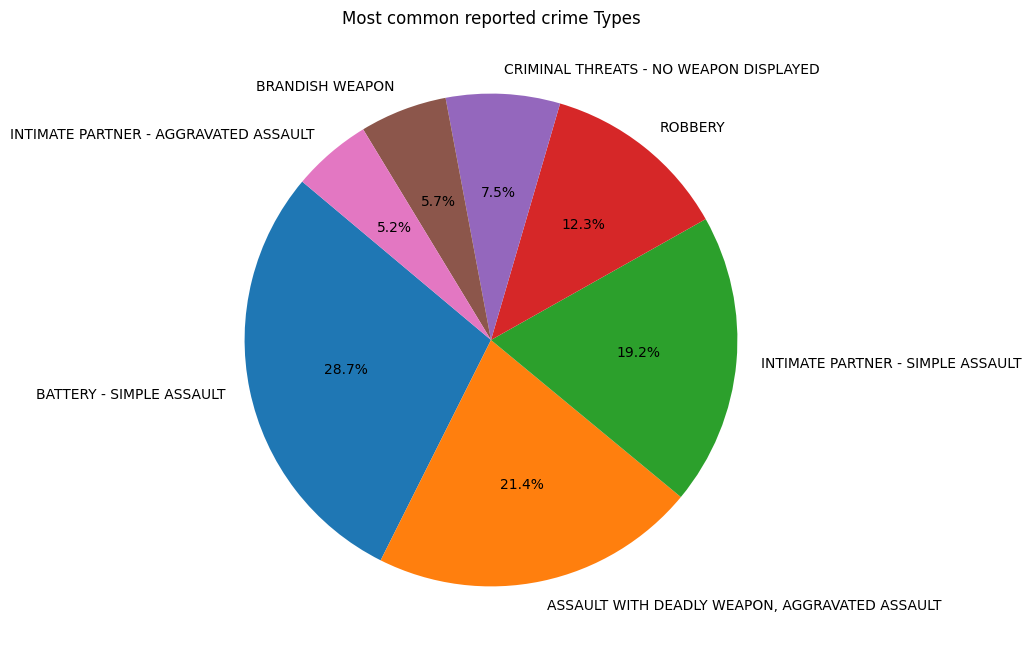

In [97]:
crime_type_counts = df['Crm Cd Desc'].value_counts()

top_n = 7
top_crime_types = crime_type_counts.head(top_n)
plt.figure(figsize=(8,8))
plt.pie(top_crime_types,labels= top_crime_types.index, autopct='%1.1f%%', startangle=140) 
plt.title('Most common reported crime Types')

### We notice that the most common reported crime types are "Battery - Simple ASSAULT," "ASSAULT WITH DEADLY WEAPON," and "Intimate partner".

## The areas in which the crime rates notibaly high or low :

<Figure size 1200x800 with 0 Axes>

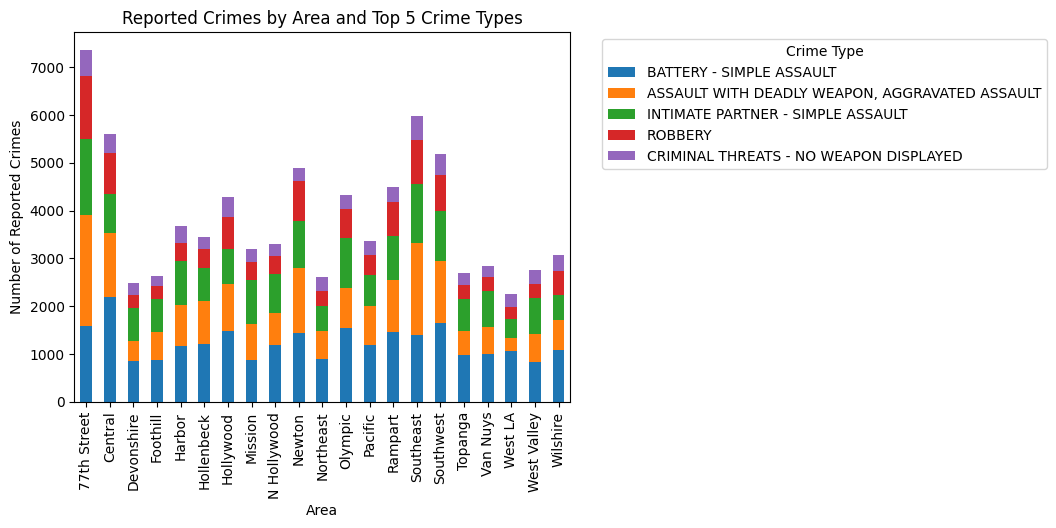

In [98]:
crime_counts = df.groupby(['AREA NAME', 'Crm Cd Desc']).size().unstack(fill_value=0)

# Get the 5 most common crime types
top_crime_types = crime_counts.sum().sort_values(ascending=False).head(5).index
crime_counts_top = crime_counts[top_crime_types]

# Plotting a clustered bar graph for the top 5 crime types
plt.figure(figsize=(12, 8))
crime_counts_top.plot(kind='bar', stacked=True)
plt.title('Reported Crimes by Area and Top 5 Crime Types')
plt.xlabel('Area')
plt.ylabel('Number of Reported Crimes')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()